## Daily LeetCode Progress Tracker

Welcome to my LeetCode progress log!  
This notebook tracks all problems I’ve solved in **Python**, **Java**, and **C#**.

Each row below represents one problem, including:
- Problem name (clickable link)
- Difficulty
- Status per language
- Short notes or insights

---

**Goal:** Solve at least 1 problem daily  
**Started:** October 2025  
**Target:** 365 problems in 2026


## Python Visualization Code

%pip install pandas jinja2 matplotlib

In [15]:
import pandas as pd
from IPython.display import display, HTML

# Load progress data
df = pd.read_csv('progress.csv')

# Add emoji summary columns (optional)
df['Solved'] = df.apply(lambda row: 'Done' if row['Python'] == 'Done' and row['Java'] == 'Done' and row['CSharp'] == 'Done' else '', axis=1)

# Display formatted table
styled = df.style.hide(axis='index').set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#1f77b4'), ('color', 'white'), ('text-align', 'center')]
    },
    {
        'selector': 'td',
        'props': [('text-align', 'center')]
    }]
).set_properties(**{
    'font-family': 'Segoe UI, sans-serif',
    'font-size': '14px',
    'border': '1px solid #ddd',
    'padding': '6px'
})

display(HTML('<h3>📊 Progress Overview</h3>'))
display(styled)


Date,Problem,Difficulty,Python,Java,CSharp,Notes,Link,Solved
07-10-2025,Container With Most Water,Medium,Done,Done,Done,Practiced two-pointer,https://leetcode.com/problems/container-with-most-water/,Done


In [16]:
# Summary by difficulty
summary = df.groupby('Difficulty')['Problem'].count().reset_index()
summary.columns = ['Difficulty', 'Count']

display(HTML('<h3>📈 Problems Solved by Difficulty</h3>'))
display(summary)


,Difficulty,Count
0,Medium,1


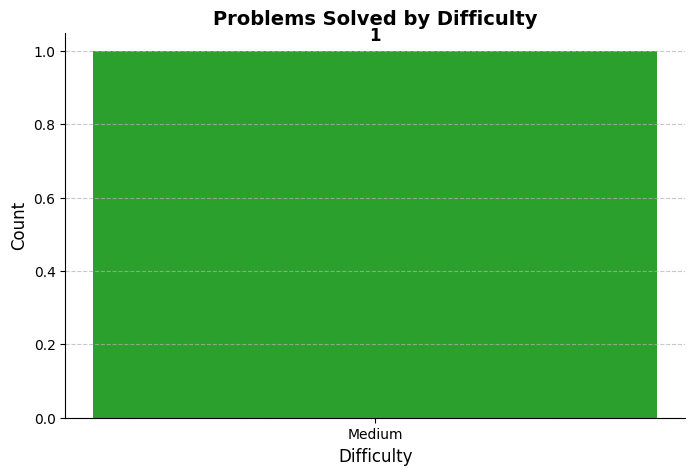

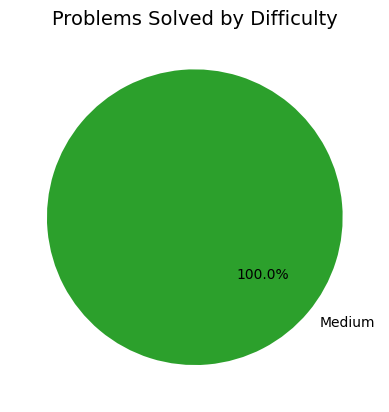

In [21]:
import matplotlib.pyplot as plt

# Define colors for difficulties
colors = ['#2ca02c', '#ff7f0e', '#d62728']  # green, orange, red

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,5))

# Plot bars
bars = ax.bar(summary['Difficulty'], summary['Count'], color=colors)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
ax.set_title('Problems Solved by Difficulty', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Difficulty', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
ax.barh(summary['Difficulty'], summary['Count'], color=colors)
plt.pie(summary['Count'], labels=summary['Difficulty'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Problems Solved by Difficulty', fontsize=14)
plt.show()
